In [116]:
#Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm


In [117]:
#Load data
gh_multipleiv_data = pd.read_csv('GroupedDataONS/GH_DT_TM_NSsec58custom-filtered-2023-11-19T14_16_01Z.csv')

In [118]:
gh_multipleiv_data

,Lower tier local authorities Code,Lower tier local authorities,General health (3 categories) Code,General health (3 categories),Hours worked (5 categories) Code,Hours worked (5 categories),Method used to travel to workplace (12 categories) Code,Method used to travel to workplace (12 categories),National Statistics Socio-economic Classification (NS-SeC) (10 categories) Code,National Statistics Socio-economic Classification (NS-SeC) (10 categories),Observation
0,E06000011,East Riding of Yorkshire,-8,Does not apply,-8,Does not apply,1,Work mainly at or from home,-8,Does not apply,0
1,E06000011,East Riding of Yorkshire,-8,Does not apply,-8,Does not apply,1,Work mainly at or from home,1,"L1, L2 and L3: Higher managerial, administrati...",0
2,E06000011,East Riding of Yorkshire,-8,Does not apply,-8,Does not apply,1,Work mainly at or from home,2,"L4, L5 and L6: Lower managerial, administrativ...",0
3,E06000011,East Riding of Yorkshire,-8,Does not apply,-8,Does not apply,1,Work mainly at or from home,3,L7: Intermediate occupations,0
4,E06000011,East Riding of Yorkshire,-8,Does not apply,-8,Does not apply,1,Work mainly at or from home,4,L8 and L9: Small employers and own account wor...,0
...,...,...,...,...,...,...,...,...,...,...,...
104395,W06000015,Cardiff,2,Not good health,4,Full-time: 49 or more hours worked,12,Not in employment or aged 15 years and under,5,L10 and L11: Lower supervisory and technical o...,0
104396,W06000015,Cardiff,2,Not good health,4,Full-time: 49 or more hours worked,12,Not in employment or aged 15 years and under,6,L12: Semi-routine occupations,0
104397,W06000015,Cardiff,2,Not good health,4,Full-time: 49 or more hours worked,12,Not in employment or aged 15 years and under,7,L13: Routine occupations,0
104398,W06000015,Cardiff,2,Not good health,4,Full-time: 49 or more hours worked,12,Not in employment or aged 15 years and under,8,L14.1 and L14.2: Never worked and long-term un...,0


In [119]:
# Rename columns
gh_multipleiv_data_fin=[]
gh_multipleiv_data_fin = gh_multipleiv_data

new_column_names=list()
new_column_names=[
'la_code'
,'la_name'
,'gh_cat'
,'gh_desc'
,'hrs_wrkd_cat'
,'hres_wrkd_desc'
,'trvlmode_cat'
,'trvlmode_desc'
,'nssec_cat'
,'nssec_desc'
,'people_cnt'
]
column_mapping = dict(zip(gh_multipleiv_data.columns, new_column_names))
gh_multipleiv_data_fin.rename(columns=column_mapping, inplace=True)

In [120]:
gh_multipleiv_data_fin

,la_code,la_name,gh_cat,gh_desc,hrs_wrkd_cat,hres_wrkd_desc,trvlmode_cat,trvlmode_desc,nssec_cat,nssec_desc,people_cnt
0,E06000011,East Riding of Yorkshire,-8,Does not apply,-8,Does not apply,1,Work mainly at or from home,-8,Does not apply,0
1,E06000011,East Riding of Yorkshire,-8,Does not apply,-8,Does not apply,1,Work mainly at or from home,1,"L1, L2 and L3: Higher managerial, administrati...",0
2,E06000011,East Riding of Yorkshire,-8,Does not apply,-8,Does not apply,1,Work mainly at or from home,2,"L4, L5 and L6: Lower managerial, administrativ...",0
3,E06000011,East Riding of Yorkshire,-8,Does not apply,-8,Does not apply,1,Work mainly at or from home,3,L7: Intermediate occupations,0
4,E06000011,East Riding of Yorkshire,-8,Does not apply,-8,Does not apply,1,Work mainly at or from home,4,L8 and L9: Small employers and own account wor...,0
...,...,...,...,...,...,...,...,...,...,...,...
104395,W06000015,Cardiff,2,Not good health,4,Full-time: 49 or more hours worked,12,Not in employment or aged 15 years and under,5,L10 and L11: Lower supervisory and technical o...,0
104396,W06000015,Cardiff,2,Not good health,4,Full-time: 49 or more hours worked,12,Not in employment or aged 15 years and under,6,L12: Semi-routine occupations,0
104397,W06000015,Cardiff,2,Not good health,4,Full-time: 49 or more hours worked,12,Not in employment or aged 15 years and under,7,L13: Routine occupations,0
104398,W06000015,Cardiff,2,Not good health,4,Full-time: 49 or more hours worked,12,Not in employment or aged 15 years and under,8,L14.1 and L14.2: Never worked and long-term un...,0


In [121]:
#Check how many records are there with does not apply value
filtered_df = gh_multipleiv_data_fin[gh_multipleiv_data_fin['gh_desc'] == 'Does not apply']
filtered_df1 = filtered_df[filtered_df['people_cnt'] != 0]
print(filtered_df1)

Empty DataFrame
Columns: [la_code, la_name, gh_cat, gh_desc, hrs_wrkd_cat, hres_wrkd_desc, trvlmode_cat, trvlmode_desc, nssec_cat, nssec_desc, people_cnt]
Index: []


In [122]:
#Check how many records are there with does not apply value
filtered_df3 = gh_multipleiv_data_fin[gh_multipleiv_data_fin['trvlmode_desc'] == 'Not in employment or aged 15 years and under']
filtered_df13 = filtered_df[filtered_df['people_cnt'] != 0]
print(filtered_df13)

Empty DataFrame
Columns: [la_code, la_name, gh_cat, gh_desc, hrs_wrkd_cat, hres_wrkd_desc, trvlmode_cat, trvlmode_desc, nssec_cat, nssec_desc, people_cnt]
Index: []


In [123]:

# Remove the records with general health does not apply as there are no values for these in people count
gh_multipleiv_data_fin = gh_multipleiv_data_fin[gh_multipleiv_data_fin['gh_desc'] != 'Does not apply']

In [124]:
# Extract the records with socio economic status as never worked
gh_1 = gh_multipleiv_data_fin[gh_multipleiv_data_fin['nssec_desc'] == 'L14.1 and L14.2: Never worked and long-term unemployed']
#gh_multipleiv_data_fin['trvlmode_desc']=='Not in employment or aged 15 years and under'
gh_1

,la_code,la_name,gh_cat,gh_desc,hrs_wrkd_cat,hres_wrkd_desc,trvlmode_cat,trvlmode_desc,nssec_cat,nssec_desc,people_cnt
608,E06000011,East Riding of Yorkshire,1,Good health,-8,Does not apply,1,Work mainly at or from home,8,L14.1 and L14.2: Never worked and long-term un...,0
618,E06000011,East Riding of Yorkshire,1,Good health,-8,Does not apply,2,"Underground, metro, light rail, tram",8,L14.1 and L14.2: Never worked and long-term un...,0
628,E06000011,East Riding of Yorkshire,1,Good health,-8,Does not apply,3,Train,8,L14.1 and L14.2: Never worked and long-term un...,0
638,E06000011,East Riding of Yorkshire,1,Good health,-8,Does not apply,4,"Bus, minibus or coach",8,L14.1 and L14.2: Never worked and long-term un...,0
648,E06000011,East Riding of Yorkshire,1,Good health,-8,Does not apply,5,Taxi,8,L14.1 and L14.2: Never worked and long-term un...,0
...,...,...,...,...,...,...,...,...,...,...,...
104358,W06000015,Cardiff,2,Not good health,4,Full-time: 49 or more hours worked,8,Passenger in a car or van,8,L14.1 and L14.2: Never worked and long-term un...,0
104368,W06000015,Cardiff,2,Not good health,4,Full-time: 49 or more hours worked,9,Bicycle,8,L14.1 and L14.2: Never worked and long-term un...,0
104378,W06000015,Cardiff,2,Not good health,4,Full-time: 49 or more hours worked,10,On foot,8,L14.1 and L14.2: Never worked and long-term un...,0
104388,W06000015,Cardiff,2,Not good health,4,Full-time: 49 or more hours worked,11,Other method of travel to work,8,L14.1 and L14.2: Never worked and long-term un...,0


In [125]:
#Remove the records with travelmode description Not in employment
gh_multipleiv_data_fin = gh_multipleiv_data_fin[gh_multipleiv_data_fin['trvlmode_desc']!='Not in employment or aged 15 years and under']#

In [126]:
#Add the records with socio economic status as never worked
#The records with travelmode desc Not in employment and other socio status is removed.
gh_multipleiv_data_fin = gh_multipleiv_data_fin.append(gh_1, ignore_index=True)

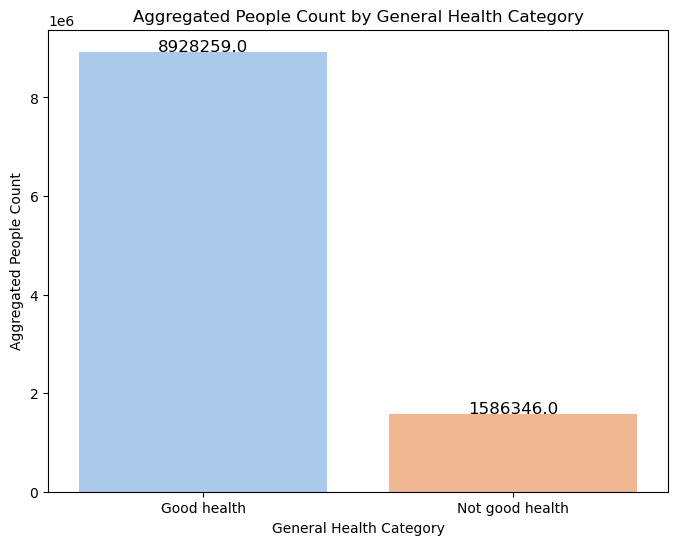

In [127]:
# Aggregate people_cnt by gh_cat
gh_agg = gh_multipleiv_data_fin.groupby('gh_desc')['people_cnt'].sum().reset_index()
#gh_agg

# Set the figure size
plt.figure(figsize=(8, 6))

# Use barplot to plot the aggregated values
ax = sns.barplot(data=gh_agg, x='gh_desc', y='people_cnt', palette='pastel')

# Annotate the count on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=12)

# Add title and labels
plt.title('Aggregated People Count by General Health Category')
plt.xlabel('General Health Category')
plt.ylabel('Aggregated People Count')

# Show the plot
plt.show()

In [74]:
gh_agg11 = gh_multipleiv_data_fin.groupby(['trvlmode_desc','nssec_desc'])['people_cnt'].sum().reset_index()
#ab=gh_agg11[gh_agg11['trvlmode_desc']=='Not in employment or aged 15 years and under']
ab=gh_agg11[gh_agg11['nssec_desc']=='L14.1 and L14.2: Never worked and long-term unemployed']
ab

,trvlmode_desc,nssec_desc,people_cnt
5,Bicycle,L14.1 and L14.2: Never worked and long-term un...,0
15,"Bus, minibus or coach",L14.1 and L14.2: Never worked and long-term un...,0
25,Driving a car or van,L14.1 and L14.2: Never worked and long-term un...,0
35,"Motorcycle, scooter or moped",L14.1 and L14.2: Never worked and long-term un...,0
40,Not in employment or aged 15 years and under,L14.1 and L14.2: Never worked and long-term un...,1633835
46,On foot,L14.1 and L14.2: Never worked and long-term un...,0
56,Other method of travel to work,L14.1 and L14.2: Never worked and long-term un...,0
66,Passenger in a car or van,L14.1 and L14.2: Never worked and long-term un...,0
76,Taxi,L14.1 and L14.2: Never worked and long-term un...,0
86,Train,L14.1 and L14.2: Never worked and long-term un...,0


In [75]:
gh_agg1 = gh_multipleiv_data_fin.groupby(['gh_desc','hres_wrkd_desc'])['people_cnt'].sum().reset_index()
gh_agg1

,gh_desc,hres_wrkd_desc,people_cnt
0,Good health,Does not apply,932415
1,Good health,Full-time: 31 to 48 hours worked,4847662
2,Good health,Full-time: 49 or more hours worked,875699
3,Good health,Part-time: 15 hours or less worked,782833
4,Good health,Part-time: 16 to 30 hours worked,1489650
5,Not good health,Does not apply,701420
6,Not good health,Full-time: 31 to 48 hours worked,459633
7,Not good health,Full-time: 49 or more hours worked,73463
8,Not good health,Part-time: 15 hours or less worked,132872
9,Not good health,Part-time: 16 to 30 hours worked,218958


In [152]:
gh_agg2 = gh_multipleiv_data_fin.groupby(['gh_desc','trvlmode_desc'])['people_cnt'].sum().reset_index()
gh_agg2

,gh_desc,trvlmode_desc,people_cnt
0,Good health,Bicycle,195018
1,Good health,"Bus, minibus or coach",568920
2,Good health,Driving a car or van,2774899
3,Good health,"Motorcycle, scooter or moped",39581
4,Good health,Not in employment or aged 15 years and under,932415
5,Good health,On foot,582885
6,Good health,Other method of travel to work,84731
7,Good health,Passenger in a car or van,257227
8,Good health,Taxi,71476
9,Good health,Train,255488


In [128]:
gh_multipleiv_data_fin 

,la_code,la_name,gh_cat,gh_desc,hrs_wrkd_cat,hres_wrkd_desc,trvlmode_cat,trvlmode_desc,nssec_cat,nssec_desc,people_cnt
0,E06000011,East Riding of Yorkshire,1,Good health,-8,Does not apply,1,Work mainly at or from home,-8,Does not apply,0
1,E06000011,East Riding of Yorkshire,1,Good health,-8,Does not apply,1,Work mainly at or from home,1,"L1, L2 and L3: Higher managerial, administrati...",0
2,E06000011,East Riding of Yorkshire,1,Good health,-8,Does not apply,1,Work mainly at or from home,2,"L4, L5 and L6: Lower managerial, administrativ...",0
3,E06000011,East Riding of Yorkshire,1,Good health,-8,Does not apply,1,Work mainly at or from home,3,L7: Intermediate occupations,0
4,E06000011,East Riding of Yorkshire,1,Good health,-8,Does not apply,1,Work mainly at or from home,4,L8 and L9: Small employers and own account wor...,0
...,...,...,...,...,...,...,...,...,...,...,...
70755,W06000015,Cardiff,2,Not good health,4,Full-time: 49 or more hours worked,8,Passenger in a car or van,8,L14.1 and L14.2: Never worked and long-term un...,0
70756,W06000015,Cardiff,2,Not good health,4,Full-time: 49 or more hours worked,9,Bicycle,8,L14.1 and L14.2: Never worked and long-term un...,0
70757,W06000015,Cardiff,2,Not good health,4,Full-time: 49 or more hours worked,10,On foot,8,L14.1 and L14.2: Never worked and long-term un...,0
70758,W06000015,Cardiff,2,Not good health,4,Full-time: 49 or more hours worked,11,Other method of travel to work,8,L14.1 and L14.2: Never worked and long-term un...,0


<Figure size 1400x1000 with 0 Axes>

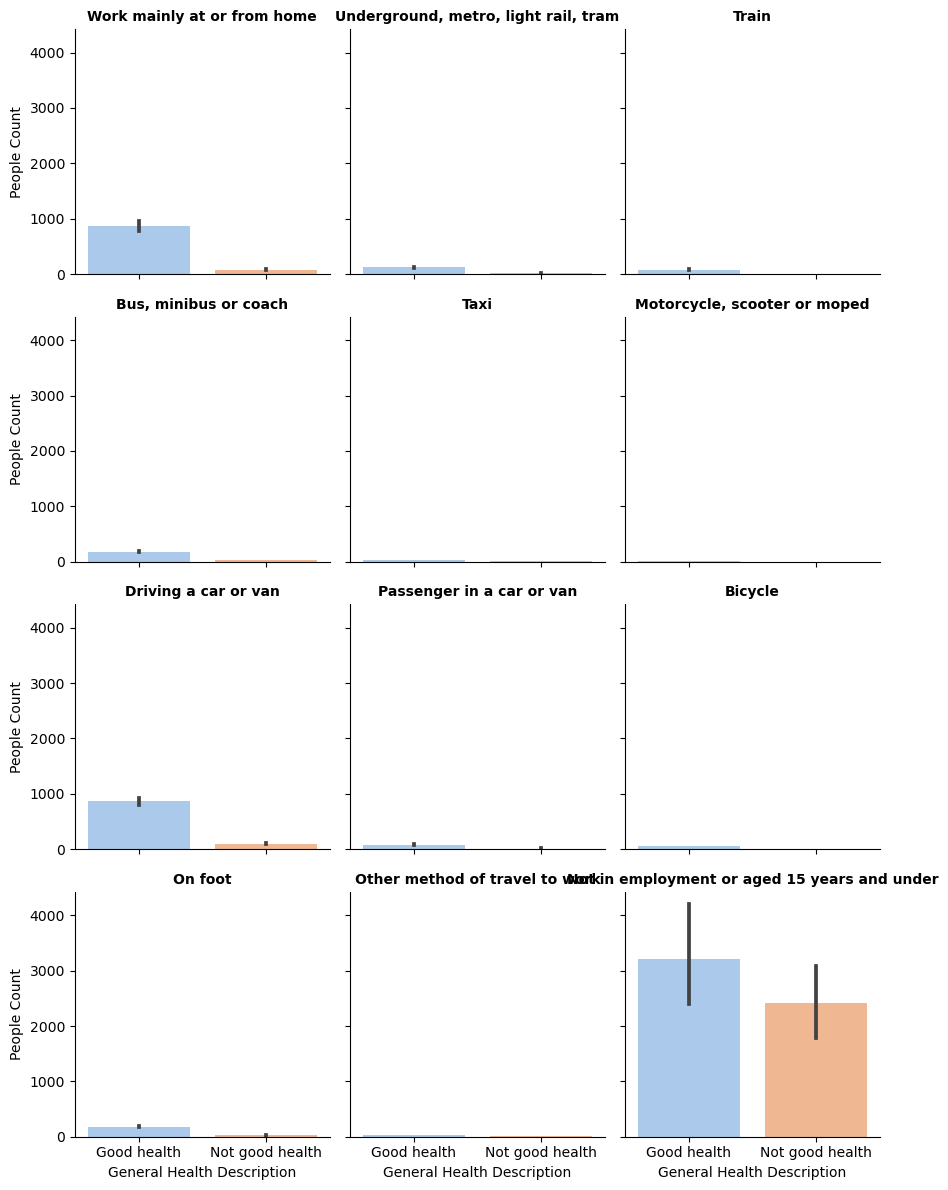

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(14, 10))

# Create a FacetGrid using Seaborn
g = sns.FacetGrid(gh_multipleiv_data_fin, col="trvlmode_desc", col_wrap=3, height=3, margin_titles=True)

# Map the barplot onto the FacetGrid
g.map(sns.barplot, 'gh_desc', 'people_cnt', palette='pastel')

# Add title and labels
g.set_axis_labels('General Health Description', 'People Count')
g.set_titles(col_template="{col_name}", fontweight='bold')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [147]:
#Select relevant columns for processing
selected_columns = ['gh_desc', 'hres_wrkd_desc', 'trvlmode_desc', 'nssec_desc']
df_selected = gh_multipleiv_data_fin[selected_columns]
df_selected

,gh_desc,hres_wrkd_desc,trvlmode_desc,nssec_desc
0,Good health,Does not apply,Work mainly at or from home,Does not apply
1,Good health,Does not apply,Work mainly at or from home,"L1, L2 and L3: Higher managerial, administrati..."
2,Good health,Does not apply,Work mainly at or from home,"L4, L5 and L6: Lower managerial, administrativ..."
3,Good health,Does not apply,Work mainly at or from home,L7: Intermediate occupations
4,Good health,Does not apply,Work mainly at or from home,L8 and L9: Small employers and own account wor...
...,...,...,...,...
70755,Not good health,Full-time: 49 or more hours worked,Passenger in a car or van,L14.1 and L14.2: Never worked and long-term un...
70756,Not good health,Full-time: 49 or more hours worked,Bicycle,L14.1 and L14.2: Never worked and long-term un...
70757,Not good health,Full-time: 49 or more hours worked,On foot,L14.1 and L14.2: Never worked and long-term un...
70758,Not good health,Full-time: 49 or more hours worked,Other method of travel to work,L14.1 and L14.2: Never worked and long-term un...


In [148]:
# Convert categorical variables to dummy variables
df_dummies = pd.get_dummies(df_selected, columns=['gh_desc', 'hres_wrkd_desc', 'trvlmode_desc', 'nssec_desc'])

df_dummies

,gh_desc_Good health,gh_desc_Not good health,hres_wrkd_desc_Does not apply,hres_wrkd_desc_Full-time: 31 to 48 hours worked,hres_wrkd_desc_Full-time: 49 or more hours worked,hres_wrkd_desc_Part-time: 15 hours or less worked,hres_wrkd_desc_Part-time: 16 to 30 hours worked,trvlmode_desc_Bicycle,"trvlmode_desc_Bus, minibus or coach",trvlmode_desc_Driving a car or van,...,nssec_desc_Does not apply,"nssec_desc_L1, L2 and L3: Higher managerial, administrative and professional occupations",nssec_desc_L10 and L11: Lower supervisory and technical occupations,nssec_desc_L12: Semi-routine occupations,nssec_desc_L13: Routine occupations,nssec_desc_L14.1 and L14.2: Never worked and long-term unemployed,nssec_desc_L15: Full-time students,"nssec_desc_L4, L5 and L6: Lower managerial, administrative and professional occupations",nssec_desc_L7: Intermediate occupations,nssec_desc_L8 and L9: Small employers and own account workers
0,1,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70755,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
70756,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
70757,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
70758,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [149]:
# Concatenate the dummy variables with the original DataFrame
df_processed=[]
df_processed = pd.concat([gh_multipleiv_data_fin, df_dummies], axis=1)

# Drop the original categorical columns and 'people_cnt' since it will be replaced
df_processed = df_processed.drop(['gh_cat', 'hrs_wrkd_cat', 'trvlmode_cat', 'nssec_cat','gh_desc', 'hres_wrkd_desc', 'trvlmode_desc', 'nssec_desc' ], axis=1)


In [153]:
df_processed

,la_code,la_name,people_cnt,gh_desc_Good health,gh_desc_Not good health,hres_wrkd_desc_Does not apply,hres_wrkd_desc_Full-time: 31 to 48 hours worked,hres_wrkd_desc_Full-time: 49 or more hours worked,hres_wrkd_desc_Part-time: 15 hours or less worked,hres_wrkd_desc_Part-time: 16 to 30 hours worked,...,nssec_desc_Does not apply,"nssec_desc_L1, L2 and L3: Higher managerial, administrative and professional occupations",nssec_desc_L10 and L11: Lower supervisory and technical occupations,nssec_desc_L12: Semi-routine occupations,nssec_desc_L13: Routine occupations,nssec_desc_L14.1 and L14.2: Never worked and long-term unemployed,nssec_desc_L15: Full-time students,"nssec_desc_L4, L5 and L6: Lower managerial, administrative and professional occupations",nssec_desc_L7: Intermediate occupations,nssec_desc_L8 and L9: Small employers and own account workers
0,E06000011,East Riding of Yorkshire,0,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,E06000011,East Riding of Yorkshire,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,E06000011,East Riding of Yorkshire,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,E06000011,East Riding of Yorkshire,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,E06000011,East Riding of Yorkshire,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70755,W06000015,Cardiff,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
70756,W06000015,Cardiff,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
70757,W06000015,Cardiff,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
70758,W06000015,Cardiff,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [156]:
# Calculate the strength of relationship between feature and class variable.  Chi square test for good health
from sklearn.feature_selection import chi2
import warnings
import scipy.stats as stats
warnings.filterwarnings("ignore")

columns_to_exclude = ['la_code', 'la_name', 'gh_desc_Not good health']

# Create a new DataFrame by excluding the specified columns
df_selected = df_processed.drop(columns=columns_to_exclude)
sel_col=df_selected.columns
data = df_processed[sel_col]
results_df = pd.DataFrame(columns=['Feature', 'Chi-Squared', 'p-value'])
# Iterate through each categorical feature
for feature in data.columns:
    if feature != 'gh_desc_Good health' and feature != 'people_cnt':  # Exclude the class variable itself
        crosstab = pd.crosstab(data['gh_desc_Good health'] , data[feature], values=data['people_cnt'], aggfunc='sum', margins=True, margins_name='Total')
        #if feature=='nssec_desc':
            #crosstab = crosstab + 1e-10
        chi2, p_value, dof, expected = stats.chi2_contingency(crosstab)
        print(f"{feature} chi-squared: {chi2:.3f} (p-value: {p_value:.3f})")


        # Number of observations
        n = crosstab.sum().sum()

        # Number of categories in the first variable
        k = crosstab.shape[0]

        # Number of categories in the second variable
        r = crosstab.shape[1]

        # Calculate Cramer's V
        cramers_v = np.sqrt(chi2 / (n * min(k-1, r-1)))

        print(f"Cramer's V value: {cramers_v}")
        #print(crosstab)
        results_df = results_df.append({'Feature': feature, 'Chi-Squared': chi2, 'p-value': p_value}, ignore_index=True)


hres_wrkd_desc_Does not apply chi-squared: 1170656.607 (p-value: 0.000)
Cramer's V value: 0.11797046345248664
hres_wrkd_desc_Full-time: 31 to 48 hours worked chi-squared: 345498.495 (p-value: 0.000)
Cramer's V value: 0.06408872107204203
hres_wrkd_desc_Full-time: 49 or more hours worked chi-squared: 43964.754 (p-value: 0.000)
Cramer's V value: 0.022861822445017655
hres_wrkd_desc_Part-time: 15 hours or less worked chi-squared: 260.424 (p-value: 0.000)
Cramer's V value: 0.001759539592109619
hres_wrkd_desc_Part-time: 16 to 30 hours worked chi-squared: 8221.002 (p-value: 0.000)
Cramer's V value: 0.009886006700674656
trvlmode_desc_Bicycle chi-squared: 11204.107 (p-value: 0.000)
Cramer's V value: 0.011541098326234704
trvlmode_desc_Bus, minibus or coach chi-squared: 832.262 (p-value: 0.000)
Cramer's V value: 0.003145492734443548
trvlmode_desc_Driving a car or van chi-squared: 76854.397 (p-value: 0.000)
Cramer's V value: 0.03022684961645385
trvlmode_desc_Motorcycle, scooter or moped chi-squared

ValueError: The internally computed table of expected frequencies has a zero element at (0, 1).

In [155]:
# Calculate the strength of relationship between feature and class variable.  Chi square test for Not good health
from sklearn.feature_selection import chi2
import warnings
import scipy.stats as stats
warnings.filterwarnings("ignore")

columns_to_exclude = ['la_code', 'la_name', 'gh_desc_Good health']

# Create a new DataFrame by excluding the specified columns
df_selected = df_processed.drop(columns=columns_to_exclude)
sel_col=df_selected.columns
data = df_processed[sel_col]
results_df = pd.DataFrame(columns=['Feature', 'Chi-Squared', 'p-value'])
# Iterate through each categorical feature
for feature in data.columns:
    if feature != 'gh_desc_Not good health' and feature != 'people_cnt':  # Exclude the class variable itself
        crosstab = pd.crosstab(data['gh_desc_Not good health'] , data[feature], values=data['people_cnt'], aggfunc='sum', margins=True, margins_name='Total')
        #if feature=='nssec_desc':
            #crosstab = crosstab + 1e-10
        chi2, p_value, dof, expected = stats.chi2_contingency(crosstab)
        print(f"{feature} chi-squared: {chi2:.3f} (p-value: {p_value:.3f})")


        # Number of observations
        n = crosstab.sum().sum()

        # Number of categories in the first variable
        k = crosstab.shape[0]

        # Number of categories in the second variable
        r = crosstab.shape[1]

        # Calculate Cramer's V
        cramers_v = np.sqrt(chi2 / (n * min(k-1, r-1)))

        print(f"Cramer's V value: {cramers_v}")
        #print(crosstab)
        results_df = results_df.append({'Feature': feature, 'Chi-Squared': chi2, 'p-value': p_value}, ignore_index=True)


hres_wrkd_desc_Does not apply chi-squared: 1170656.607 (p-value: 0.000)
Cramer's V value: 0.11797046345248663
hres_wrkd_desc_Full-time: 31 to 48 hours worked chi-squared: 345498.495 (p-value: 0.000)
Cramer's V value: 0.06408872107204203
hres_wrkd_desc_Full-time: 49 or more hours worked chi-squared: 43964.754 (p-value: 0.000)
Cramer's V value: 0.022861822445017655
hres_wrkd_desc_Part-time: 15 hours or less worked chi-squared: 260.424 (p-value: 0.000)
Cramer's V value: 0.001759539592109619
hres_wrkd_desc_Part-time: 16 to 30 hours worked chi-squared: 8221.002 (p-value: 0.000)
Cramer's V value: 0.009886006700674656
trvlmode_desc_Bicycle chi-squared: 11204.107 (p-value: 0.000)
Cramer's V value: 0.011541098326234704
trvlmode_desc_Bus, minibus or coach chi-squared: 832.262 (p-value: 0.000)
Cramer's V value: 0.003145492734443548
trvlmode_desc_Driving a car or van chi-squared: 76854.397 (p-value: 0.000)
Cramer's V value: 0.03022684961645385
trvlmode_desc_Motorcycle, scooter or moped chi-squared

ValueError: The internally computed table of expected frequencies has a zero element at (0, 1).

In [72]:
# Calculate the strength of relationship between feature and class variable.  - on overall data
from sklearn.feature_selection import chi2
import warnings
import scipy.stats as stats
warnings.filterwarnings("ignore")
sel_col=['gh_desc','hres_wrkd_desc','trvlmode_desc','nssec_desc','people_cnt']
data = gh_multipleiv_data_fin[sel_col]
results_df = pd.DataFrame(columns=['Feature', 'Chi-Squared', 'p-value'])
# Iterate through each categorical feature
for feature in data.columns:
    if feature != 'gh_desc' and feature != 'people_cnt':  # Exclude the class variable itself
        crosstab = pd.crosstab(data['gh_desc'] , data[feature], values=data['people_cnt'], aggfunc='sum', margins=True, margins_name='Total')
        if feature=='nssec_desc':
            crosstab = crosstab + 1e-10
        chi2, p_value, dof, expected = stats.chi2_contingency(crosstab)
        print(f"{feature} chi-squared: {chi2:.3f} (p-value: {p_value:.3f})")


        # Number of observations
        n = crosstab.sum().sum()

        # Number of categories in the first variable
        k = crosstab.shape[0]

        # Number of categories in the second variable
        r = crosstab.shape[1]

        # Calculate Cramer's V
        cramers_v = np.sqrt(chi2 / (n * min(k-1, r-1)))

        print(f"Cramer's V value: {cramers_v}")
        #print(crosstab)
        results_df = results_df.append({'Feature': feature, 'Chi-Squared': chi2, 'p-value': p_value}, ignore_index=True)


hres_wrkd_desc chi-squared: 1206976.970 (p-value: 0.000)
Cramer's V value: 0.1197865390450228
trvlmode_desc chi-squared: 1196728.338 (p-value: 0.000)
Cramer's V value: 0.11927689167112421
nssec_desc chi-squared: 1226204.478 (p-value: 0.000)
Cramer's V value: 0.12073688706168294


In [129]:
import statsmodels.api as sm

# Create a contingency table with counts
contingency_table = pd.crosstab(gh_multipleiv_data_fin['gh_desc'],[gh_multipleiv_data_fin['hres_wrkd_desc'], gh_multipleiv_data_fin['trvlmode_desc'], gh_multipleiv_data_fin['nssec_desc']], values=gh_multipleiv_data_fin['people_cnt'], aggfunc='sum', margins=True, margins_name='Total')

# Extract the independent variables
independent_vars = contingency_table.columns.get_level_values(0).values

# Separate the counts and the independent variables
counts = contingency_table.iloc[:, -1]
independent_data = contingency_table.iloc[:, :-1]


# Fit log-linear model
loglinear_model = sm.MNLogit(counts, independent_data)
result = loglinear_model.fit()

# Display results
print(result.summary())

         Current function value: 0.000000
         Iterations: 35


LinAlgError: Singular matrix

In [130]:
# Create a contingency table with counts
contingency_table = pd.crosstab(gh_multipleiv_data_fin['gh_desc'],[gh_multipleiv_data_fin['hres_wrkd_desc'], gh_multipleiv_data_fin['trvlmode_desc'], gh_multipleiv_data_fin['nssec_desc']], values=gh_multipleiv_data_fin['people_cnt'], aggfunc='sum', margins=True, margins_name='Total')


In [131]:
contingency_table

hres_wrkd_desc  Does not apply  \
trvlmode_desc          Bicycle   
nssec_desc      Does not apply   
gh_desc                          
Good health                  0   
Not good health              0   
Total                        0   

hres_wrkd_desc                                                                                 \
trvlmode_desc                                                                                   
nssec_desc      L1, L2 and L3: Higher managerial, administrative and professional occupations   
gh_desc                                                                                         
Good health                                                      0                              
Not good health                                                  0                              
Total                                                            0                              

hres_wrkd_desc                                                            \
trvlmode_desc                                                              
nssec_desc      L10 and L11: Lower supervisory and technical occupations   
gh_desc                                                                    
Good health                                                      0         
Not good health                                                  0         
Total                                                            0         

hres_wrkd_desc                                                          \
trvlmode_desc                                                            
nssec_desc      L12: Semi-routine occupations L13: Routine occupations   
gh_desc                                                                  
Good health                                 0                        0   
Not good health                             0                        0   
Total                                       0                        0   

hres_wrkd_desc                                                          \
trvlmode_desc                                                            
nssec_desc      L14.1 and L14.2: Never worked and long-term unemployed   
gh_desc                                                                  
Good health                                                      0       
Not good health                                                  0       
Total                                                            0       

hres_wrkd_desc                           \
trvlmode_desc                             
nssec_desc      L15: Full-time students   
gh_desc                                   
Good health                           0   
Not good health                       0   
Total                                 0   

hres_wrkd_desc                                                                                \
trvlmode_desc                                                                                  
nssec_desc      L4, L5 and L6: Lower managerial, administrative and professional occupations   
gh_desc                                                                                        
Good health                                                      0                             
Not good health                                                  0                             
Total                                                            0                             

hres_wrkd_desc                                \
trvlmode_desc                                  
nssec_desc      L7: Intermediate occupations   
gh_desc                                        
Good health                                0   
Not good health                            0   
Total                                      0   

hres_wrkd_desc                                                      ...  \
trvlmode_desc                                                       ...   
nssec_desc      L8 and L9: Small employers and o

In [101]:
contingency_table.columns.get_level_values(1).unique()

Index(['Bicycle', 'Bus, minibus or coach', 'Driving a car or van',
       'Motorcycle, scooter or moped',
       'Not in employment or aged 15 years and under', 'On foot',
       'Other method of travel to work', 'Passenger in a car or van', 'Taxi',
       'Train', 'Underground, metro, light rail, tram',
       'Work mainly at or from home', ''],
      dtype='object', name='trvlmode_desc')

In [104]:
multi_index = contingency_table.columns

# Extract the independent variables
multi_index.levels

FrozenList([['Does not apply', 'Full-time: 31 to 48 hours worked', 'Full-time: 49 or more hours worked', 'Part-time: 15 hours or less worked', 'Part-time: 16 to 30 hours worked', 'Total'], ['', 'Bicycle', 'Bus, minibus or coach', 'Driving a car or van', 'Motorcycle, scooter or moped', 'Not in employment or aged 15 years and under', 'On foot', 'Other method of travel to work', 'Passenger in a car or van', 'Taxi', 'Train', 'Underground, metro, light rail, tram', 'Work mainly at or from home'], ['', 'Does not apply', 'L1, L2 and L3: Higher managerial, administrative and professional occupations', 'L10 and L11: Lower supervisory and technical occupations', 'L12: Semi-routine occupations', 'L13: Routine occupations', 'L14.1 and L14.2: Never worked and long-term unemployed', 'L15: Full-time students', 'L4, L5 and L6: Lower managerial, administrative and professional occupations', 'L7: Intermediate occupations', 'L8 and L9: Small employers and own account workers']])

In [106]:
# Create a contingency table with counts
contingency_table = pd.crosstab(gh_multipleiv_data_fin['gh_desc'],[gh_multipleiv_data_fin['hres_wrkd_desc'], gh_multipleiv_data_fin['trvlmode_desc'], gh_multipleiv_data_fin['nssec_desc']], values=gh_multipleiv_data_fin['people_cnt'], aggfunc='sum', margins=True, margins_name='Total')

# Assuming contingency_table is your previously created contingency table
multi_index = contingency_table.columns

# Extract the independent variables
independent_vars = multi_index.levels

# Separate the counts and the independent variables
counts = contingency_table.iloc[:, -1]
independent_data = contingency_table.iloc[:, :-1]



In [111]:
contingency_table.iloc[:, -1]

gh_desc
Good health         8928259
Not good health     1586346
Total              10514605
Name: (Total, , ), dtype: int64

In [108]:
independent_data

hres_wrkd_desc  Does not apply  \
trvlmode_desc          Bicycle   
nssec_desc      Does not apply   
gh_desc                          
Good health                  0   
Not good health              0   
Total                        0   

hres_wrkd_desc                                                                                 \
trvlmode_desc                                                                                   
nssec_desc      L1, L2 and L3: Higher managerial, administrative and professional occupations   
gh_desc                                                                                         
Good health                                                      0                              
Not good health                                                  0                              
Total                                                            0                              

hres_wrkd_desc                                                            \
trvlmode_desc                                                              
nssec_desc      L10 and L11: Lower supervisory and technical occupations   
gh_desc                                                                    
Good health                                                      0         
Not good health                                                  0         
Total                                                            0         

hres_wrkd_desc                                                          \
trvlmode_desc                                                            
nssec_desc      L12: Semi-routine occupations L13: Routine occupations   
gh_desc                                                                  
Good health                                 0                        0   
Not good health                             0                        0   
Total                                       0                        0   

hres_wrkd_desc                                                          \
trvlmode_desc                                                            
nssec_desc      L14.1 and L14.2: Never worked and long-term unemployed   
gh_desc                                                                  
Good health                                                      0       
Not good health                                                  0       
Total                                                            0       

hres_wrkd_desc                           \
trvlmode_desc                             
nssec_desc      L15: Full-time students   
gh_desc                                   
Good health                           0   
Not good health                       0   
Total                                 0   

hres_wrkd_desc                                                                                \
trvlmode_desc                                                                                  
nssec_desc      L4, L5 and L6: Lower managerial, administrative and professional occupations   
gh_desc                                                                                        
Good health                                                      0                             
Not good health                                                  0                             
Total                                                            0                             

hres_wrkd_desc                                \
trvlmode_desc                                  
nssec_desc      L7: Intermediate occupations   
gh_desc                                        
Good health                                0   
Not good health                            0   
Total                                      0   

hres_wrkd_desc                                                      ...  \
trvlmode_desc                                                       ...   
nssec_desc      L8 and L9: Small employers and o

In [110]:
# Fit log-linear model
loglinear_model = sm.MNLogit(counts, independent_data)
result = loglinear_model.fit()

# Display results
print(result.summary())

         Current function value: 0.000000
         Iterations: 35


LinAlgError: Singular matrix

In [80]:
import statsmodels.api as sm
import pandas as pd

# Assuming 'data' is your DataFrame
# Select relevant columns
selected_columns = ['gh_desc', 'hres_wrkd_desc', 'trvlmode_desc', 'nssec_desc', 'people_cnt']
data_selected = gh_multipleiv_data_fin[selected_columns]

# Create a contingency table

contingency_table = pd.crosstab(
    [data_selected['gh_desc']],
    [data_selected['hres_wrkd_desc'], data_selected['trvlmode_desc'], data_selected['nssec_desc']],
    values=data_selected['people_cnt'],
    aggfunc='sum',
    margins=True,
    margins_name='Total'
)
# Flatten the table for modeling
flattened_table = contingency_table.values.ravel()

# Fit a loglinear model
loglinear_model = sm.GLM(flattened_table, sm.add_constant(contingency_table.columns), family=sm.families.Poisson())
result = loglinear_model.fit()

# Display summary statistics
print(result.summary())


TypeError: unsupported operand type(s) for -: 'tuple' and 'tuple'

In [72]:
#create a model using Poisson regression model

import statsmodels.api as sm

# Assuming df is your DataFrame with the provided data
# Select relevant columns
data = gh_trvlmode_data_fin[['gh_cat', 'trvlmode_cat', 'people_cnt']]

# Create dummy variables for the categorical variable trvlmode_cat
data_dummies = pd.get_dummies(data, columns=['trvlmode_cat'], prefix='trvlmode')

# Aggregate data to create a binary outcome variable
data_dummies['gh_cat_binary'] = (data_dummies['gh_cat'] == 1).astype(int)

# Aggregate data by summing people_cnt for each combination
aggregated_data = data_dummies.groupby(['gh_cat_binary', 'trvlmode_1', 'trvlmode_2', 'trvlmode_3', 'trvlmode_4', 'trvlmode_5', 'trvlmode_6', 'trvlmode_7', 'trvlmode_8', 'trvlmode_9', 'trvlmode_10', 'trvlmode_11']).agg({'people_cnt': 'sum'}).reset_index()

# Define independent variables
X = aggregated_data[['trvlmode_1', 'trvlmode_2', 'trvlmode_3', 'trvlmode_4', 'trvlmode_5', 'trvlmode_6', 'trvlmode_7', 'trvlmode_8', 'trvlmode_9', 'trvlmode_10', 'trvlmode_11']]
y = aggregated_data['gh_cat_binary']

# Add an intercept term
X = sm.add_constant(X)

# Fit Poisson regression model with offset
poisson_model = sm.GLM(y, X, family=sm.families.Poisson(), offset=np.log(aggregated_data['people_cnt']))
result = poisson_model.fit()

# Display the summary
print(result.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:          gh_cat_binary   No. Observations:                   22
Model:                            GLM   Df Residuals:                       11
Model Family:                 Poisson   Df Model:                           10
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12.389
Date:                Fri, 17 Nov 2023   Deviance:                       2.7786
Time:                        19:29:01   Pearson chi2:                     1.49
No. Iterations:                     4   Pseudo R-squ. (CS):             0.6424
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -12.5704      0.276    -45.482      

In [74]:
# Coefficients from the Poisson regression model
coefficients = result.params

# Define the predictor variables for a specific category (e.g., gh_cat_binary = 0)
predictor_values = aggregated_data[['trvlmode_1', 'trvlmode_2', 'trvlmode_3', 'trvlmode_4', 'trvlmode_5', 'trvlmode_6', 'trvlmode_7', 'trvlmode_8', 'trvlmode_9', 'trvlmode_10', 'trvlmode_11']].loc[aggregated_data['gh_cat_binary'] == 0].iloc[0]

coefficients = coefficients[:-1] 
# Calculate the log-odds for the specified category
log_odds = np.dot(coefficients, predictor_values)

# Convert log-odds to probability
probability = np.exp(log_odds) / (1 + np.exp(log_odds))

# Display the results
print(f"Probability for gh_cat_binary = 0: {probability:.4f}")


Probability for gh_cat_binary = 0: 0.1199


In [87]:
# Obtain predicted probabilities
predicted_probs = result.predict(X)

# Combine predicted probabilities with the original data
aggregated_data['predicted_probs'] = predicted_probs

# Calculate the probability of reporting "Good health" for each travel mode
prob_good_health_by_mode = aggregated_data.groupby('trvlmode_10')['predicted_probs'].mean().reset_index()

# Display the results
#print(prob_good_health_by_mode)


# Multiply the predicted probabilities by 100 to get percentages
prob_good_health_by_mode['predicted_probs_percent'] = prob_good_health_by_mode['predicted_probs'] * 100

# Display the results
print(prob_good_health_by_mode)


   trvlmode_10  predicted_probs  predicted_probs_percent
0            0     2.385251e-06                 0.000239
1            1     4.731775e-07                 0.000047


In [90]:
predictor_values_cat0 = aggregated_data[['trvlmode_1']].loc[aggregated_data['gh_cat_binary'] == 0].values
predictor_values_cat0

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1]], dtype=uint64)

In [111]:
# Assuming you have a variable named 'coefficients' containing your logistic regression coefficients
a=coefficients[1:].values

coefficients_reshaped = a.reshape(11, 1)

coefficients_reshaped.tolist()

[[-3.405093620128345],
 [-0.5624537697135024],
 [-0.6092008991008795],
 [-1.3943099232567144],
 [0.3619880897493952],
 [0.8041833747738885],
 [-3.7727327127489225],
 [-1.3251918396653446],
 [-0.6814865541139525],
 [-1.9933474503329531],
 [0.007197420765259643]]

In [112]:
predictor_values_cat0.tolist()

[[0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1]]

In [114]:

np.dot(predictor_values_cat0.T, coefficients_reshaped)

array([[0.00719742]])

In [118]:
# Coefficients from the Poisson regression model
coefficients = result.params
a=coefficients[1:].values
coefficients_reshaped = a.reshape(11, 1)
# List of travel modes
travel_modes = ['trvlmode_1', 'trvlmode_2', 'trvlmode_3', 'trvlmode_4', 'trvlmode_5', 'trvlmode_6', 'trvlmode_7', 'trvlmode_8', 'trvlmode_9', 'trvlmode_10', 'trvlmode_11']

# Create an empty DataFrame to store the results
probability_df = pd.DataFrame(columns=['Travel_Mode', 'gh_cat_binary_0', 'gh_cat_binary_1'])

# Iterate through each travel mode
for travel_mode in travel_modes:
    # Select the predictor variable for gh_cat_binary = 0
    predictor_values_cat0 = aggregated_data[[travel_mode]].loc[aggregated_data['gh_cat_binary'] == 0].values
    
    # Calculate the log-odds for gh_cat_binary = 0
    log_odds_cat0 = np.dot(predictor_values_cat0.T, coefficients_reshaped) + coefficients[0]  # Add the intercept term
    
    # Convert log-odds to probability for gh_cat_binary = 0
    probability_cat0 = np.exp(log_odds_cat0) / (1 + np.exp(log_odds_cat0))
    
    # Select the predictor variable for gh_cat_binary = 1
    predictor_values_cat1 = aggregated_data[[travel_mode]].loc[aggregated_data['gh_cat_binary'] == 1].values
    
    # Calculate the log-odds for gh_cat_binary = 1
    log_odds_cat1 = np.dot(predictor_values_cat1.T, coefficients_reshaped) + coefficients[0]  # Add the intercept term
    
    # Convert log-odds to probability for gh_cat_binary = 1
    probability_cat1 = np.exp(log_odds_cat1) / (1 + np.exp(log_odds_cat1))
    
    # Append the results to the DataFrame
    probability_df = probability_df.append({'Travel_Mode': travel_mode, 'gh_cat_binary_0': probability_cat0.item(), 'gh_cat_binary_1': probability_cat1.item()}, ignore_index=True)

# Display the results
print(probability_df)


    Travel_Mode  gh_cat_binary_0  gh_cat_binary_1
0    trvlmode_1     3.498228e-06     3.498228e-06
1    trvlmode_2     4.731772e-07     4.731772e-07
2    trvlmode_3     1.756941e-06     1.756941e-06
3    trvlmode_4     9.229963e-07     9.229963e-07
4    trvlmode_5     7.984483e-08     7.984483e-08
5    trvlmode_6     7.761986e-06     7.761986e-06
6    trvlmode_7     4.988054e-06     4.988054e-06
7    trvlmode_8     8.613554e-07     8.613554e-07
8    trvlmode_9     1.888645e-06     1.888645e-06
9   trvlmode_10     1.979030e-06     1.979030e-06
10  trvlmode_11     1.153215e-07     1.153215e-07


C:\Users\91956\AppData\Local\Temp\ipykernel_28584\3830041324.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  probability_df = probability_df.append({'Travel_Mode': travel_mode, 'gh_cat_binary_0': probability_cat0.item(), 'gh_cat_binary_1': probability_cat1.item()}, ignore_index=True)
C:\Users\91956\AppData\Local\Temp\ipykernel_28584\3830041324.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  probability_df = probability_df.append({'Travel_Mode': travel_mode, 'gh_cat_binary_0': probability_cat0.item(), 'gh_cat_binary_1': probability_cat1.item()}, ignore_index=True)
C:\Users\91956\AppData\Local\Temp\ipykernel_28584\3830041324.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  probability_df = probability_df.append(

In [ ]:
# Select predictor variables
predictor_values_cat0 = aggregated_data[['peoplecnt', travel_mode]].loc[aggregated_data['gh_cat_binary'] == 0].values
predictor_values_cat1 = aggregated_data[['peoplecnt', travel_mode]].loc[aggregated_data['gh_cat_binary'] == 1].values

# Calculate log-odds
log_odds_cat0 = np.dot(predictor_values_cat0.T, coefficients.values) + coefficients[0]
log_odds_cat1 = np.dot(predictor_values_cat1, coefficients.values) + coefficients[0]

# Convert log-odds to probability
probability_cat0 = np.exp(log_odds_cat0) / (1 + np.exp(log_odds_cat0))
probability_cat1 = np.exp(log_odds_cat1) / (1 + np.exp(log_odds_cat1))


In [63]:
aggregated_data

,gh_cat_binary,trvlmode_1,trvlmode_2,trvlmode_3,trvlmode_4,trvlmode_5,trvlmode_6,trvlmode_7,trvlmode_8,trvlmode_9,trvlmode_10,trvlmode_11,people_cnt
0,0,0,0,0,0,0,0,0,0,0,0,1,47257
1,0,0,0,0,0,0,0,0,0,0,1,0,248030
2,0,0,0,0,0,0,0,0,0,1,0,0,47445
3,0,0,0,0,0,0,0,0,1,0,0,0,132854
4,0,0,0,0,0,0,0,1,0,0,0,0,1283513
5,0,0,0,0,0,0,1,0,0,0,0,0,15796
6,0,0,0,0,0,1,0,0,0,0,0,0,36497
7,0,0,0,0,1,0,0,0,0,0,0,0,170232
8,0,0,0,1,0,0,0,0,0,0,0,0,44860
9,0,0,1,0,0,0,0,0,0,0,0,0,39735


In [57]:

array(['Work mainly at or from home',
       'Underground, metro, light rail, tram',
         'Train',
       'Bus, minibus or coach',
         'Taxi',
           'Motorcycle, scooter or moped',
       'Driving a car or van', 
       'Passenger in a car or van', 
       'Bicycle',
       'On foot',
         'Other method of travel to work'], dtype=object)

data_dummies

,gh_cat,people_cnt,trvlmode_1,trvlmode_2,trvlmode_3,trvlmode_4,trvlmode_5,trvlmode_6,trvlmode_7,trvlmode_8,trvlmode_9,trvlmode_10,trvlmode_11,gh_cat_binary
12,1,5756,1,0,0,0,0,0,0,0,0,0,0,1
13,1,30,0,1,0,0,0,0,0,0,0,0,0,1
14,1,244,0,0,1,0,0,0,0,0,0,0,0,1
15,1,1007,0,0,0,1,0,0,0,0,0,0,0,1
16,1,508,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11874,2,1671,0,0,0,0,0,0,1,0,0,0,0,0
11875,2,275,0,0,0,0,0,0,0,1,0,0,0,0
11876,2,9,0,0,0,0,0,0,0,0,1,0,0,0
11877,2,239,0,0,0,0,0,0,0,0,0,1,0,0


In [9]:
print(gh_trvlmode_data_fin['la_name'].unique())

['Hartlepool' 'Middlesbrough' 'Redcar and Cleveland' 'Stockton-on-Tees'
 'Darlington' 'Halton' 'Warrington' 'Blackburn with Darwen' 'Blackpool'
 'Kingston upon Hull' 'East Riding of Yorkshire' 'North East Lincolnshire'
 'North Lincolnshire' 'York' 'Derby' 'Leicester' 'Rutland' 'Nottingham'
 'Herefordshire' 'Telford and Wrekin' 'Stoke-on-Trent'
 'Bath and North East Somerset' 'Bristol' 'North Somerset'
 'South Gloucestershire' 'Plymouth' 'Torbay' 'Swindon' 'Peterborough'
 'Luton' 'Southend-on-Sea' 'Thurrock' 'Medway' 'Bracknell Forest'
 'West Berkshire' 'Reading' 'Slough' 'Windsor and Maidenhead' 'Wokingham'
 'Milton Keynes' 'Brighton and Hove' 'Portsmouth' 'Southampton'
 'Isle of Wight' 'County Durham' 'Cheshire East'
 'Cheshire West and Chester' 'Shropshire' 'Cornwall' 'Wiltshire' 'Bedford'
 'Central Bedfordshire' 'Northumberland'
 'Bournemouth, Christchurch and Poole' 'Dorset' 'Buckinghamshire'
 'North Northamptonshire' 'West Northamptonshire' 'Cambridge'
 'East Cambridgeshire' 'Fenl

In [11]:
new=gh_trvlmode_data_fin[gh_trvlmode_data_fin['la_name']=='Bristol']

In [12]:
from sklearn.preprocessing import OneHotEncoder

# Create the encoder
encoder = OneHotEncoder()


# Assuming df is your DataFrame
df_encoded = pd.get_dummies(new, columns=['gh_cat', 'trvlmode_cat'], prefix=['gh', 'trvlmodes'])


In [35]:
df_encoded['people_cnt'].sum()

238510

In [17]:
from scipy.stats import pointbiserialr

correlation, p_value = pointbiserialr(df_encoded['gh_1'], df_encoded['trvlmodes_3'])
print(f"Point-Biserial Correlation: {correlation}, p-value: {p_value}")

Point-Biserial Correlation: 1.4407267512020765e-18, p-value: 1.0


In [18]:
column_pattern = 'trvlmodes_'  # Replace with your desired pattern
matching_columns = [col for col in df_encoded.columns if col.startswith(column_pattern)]

In [33]:
df_encoded['trvlmode_desc'].unique()

array(['Work mainly at or from home',
       'Underground, metro, light rail, tram', 'Train',
       'Bus, minibus or coach', 'Taxi', 'Motorcycle, scooter or moped',
       'Driving a car or van', 'Passenger in a car or van', 'Bicycle',
       'On foot', 'Other method of travel to work',
       'Not in employment or aged 15 years and under'], dtype=object)

In [34]:
df_encoded=df_encoded[df_encoded['trvlmode_desc']!='Not in employment or aged 15 years and under']

In [19]:
from scipy.stats import pearsonr
# Select the two columns for which you want to calculate the correlation
column2 = df_encoded['gh_1']
correlation_table=[]
for columnname in matching_columns:
    column1 = df_encoded[columnname]
     # Calculate the correlation coefficient and p-value
    correlation_coefficient, p_value = pearsonr(column1, column2)
    correlation_table.append([columnname,'GH',correlation_coefficient,p_value])

# Create a Pandas DataFrame from the correlation_table
correlation_df = pd.DataFrame(correlation_table, columns=['column1', 'column2', 'correlation_coefficient', 'p_value'])

# Print the results
correlation_df

,column1,column2,correlation_coefficient,p_value
0,trvlmodes_1,GH,1.440727e-18,1.0
1,trvlmodes_2,GH,1.440727e-18,1.0
2,trvlmodes_3,GH,1.440727e-18,1.0
3,trvlmodes_4,GH,1.440727e-18,1.0
4,trvlmodes_5,GH,2.919630e-17,1.0
5,trvlmodes_6,GH,2.919630e-17,1.0
6,trvlmodes_7,GH,2.919630e-17,1.0
7,trvlmodes_8,GH,2.919630e-17,1.0
8,trvlmodes_9,GH,2.919630e-17,1.0
9,trvlmodes_10,GH,2.919630e-17,1.0


In [20]:
# Repeat rows based on 'people_cnt'
df_replicated = df_encoded.loc[df_encoded.index.repeat(df_encoded['people_cnt'])].reset_index(drop=True)


In [21]:
df_replicated.shape[0]

472465

In [45]:
df_replicated.head(10)

,la_code,la_name,gh_desc,trvlmode_desc,people_cnt,gh_1,gh_2,trvlmodes_1,trvlmodes_2,trvlmodes_3,trvlmodes_4,trvlmodes_5,trvlmodes_6,trvlmodes_7,trvlmodes_8,trvlmodes_9,trvlmodes_10,trvlmodes_11,trvlmodes_12
0,E06000001,Hartlepool,Good health,Work mainly at or from home,5756,1,0,1,0,0,0,0,0,0,0,0,0,0,0
1,E06000001,Hartlepool,Good health,Work mainly at or from home,5756,1,0,1,0,0,0,0,0,0,0,0,0,0,0
2,E06000001,Hartlepool,Good health,Work mainly at or from home,5756,1,0,1,0,0,0,0,0,0,0,0,0,0,0
3,E06000001,Hartlepool,Good health,Work mainly at or from home,5756,1,0,1,0,0,0,0,0,0,0,0,0,0,0
4,E06000001,Hartlepool,Good health,Work mainly at or from home,5756,1,0,1,0,0,0,0,0,0,0,0,0,0,0
5,E06000001,Hartlepool,Good health,Work mainly at or from home,5756,1,0,1,0,0,0,0,0,0,0,0,0,0,0
6,E06000001,Hartlepool,Good health,Work mainly at or from home,5756,1,0,1,0,0,0,0,0,0,0,0,0,0,0
7,E06000001,Hartlepool,Good health,Work mainly at or from home,5756,1,0,1,0,0,0,0,0,0,0,0,0,0,0
8,E06000001,Hartlepool,Good health,Work mainly at or from home,5756,1,0,1,0,0,0,0,0,0,0,0,0,0,0
9,E06000001,Hartlepool,Good health,Work mainly at or from home,5756,1,0,1,0,0,0,0,0,0,0,0,0,0,0


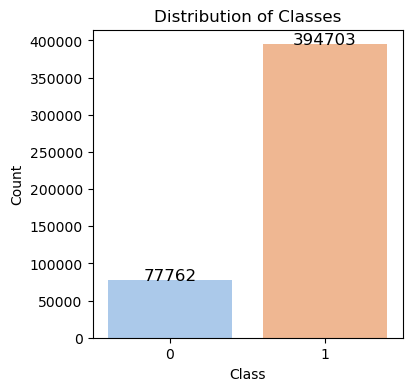

In [22]:
plt.figure(figsize=(4, 4))
ax=sns.countplot(data=df_replicated, x='gh_1', palette='pastel')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=12)
# Add title and labels
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Count')
# Show the plot
plt.show()

In [24]:
# Calculate the strength of relationship between feature and class variable.
#warnings.filterwarnings("ignore")
from sklearn.feature_selection import chi2
import scipy.stats as stats

data = df_replicated.drop('la_code', axis=1)
data = data.drop('gh_desc',	axis=1)
data = data.drop('la_name', axis=1)
data = data.drop('trvlmode_desc',axis=1)
data = data.drop('people_cnt', axis=1)
data = data.drop('gh_2', axis=1)
results_df = pd.DataFrame(columns=['Feature', 'Chi-Squared', 'p-value'])
# Iterate through each categorical feature
for feature in data.columns:
    if feature != 'gh_1':  # Exclude the class variable itself
        crosstab = pd.crosstab(data[feature], data['gh_1'])
        chi2, p_value, dof, expected = stats.chi2_contingency(crosstab)
        print(f"{feature} chi-squared: {chi2:.3f} (p-value: {p_value:.3f})")
        results_df = results_df.append({'Feature': feature, 'Chi-Squared': chi2, 'p-value': p_value}, ignore_index=True)


trvlmodes_1 chi-squared: 5245.811 (p-value: 0.000)
trvlmodes_2 chi-squared: 4.493 (p-value: 0.034)
trvlmodes_3 chi-squared: 78.324 (p-value: 0.000)


C:\Users\91956\AppData\Local\Temp\ipykernel_28584\3441566256.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Feature': feature, 'Chi-Squared': chi2, 'p-value': p_value}, ignore_index=True)
C:\Users\91956\AppData\Local\Temp\ipykernel_28584\3441566256.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Feature': feature, 'Chi-Squared': chi2, 'p-value': p_value}, ignore_index=True)
C:\Users\91956\AppData\Local\Temp\ipykernel_28584\3441566256.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Feature': feature, 'Chi-Squared': chi2, 'p-value': p_value}, ignore_index=True)


trvlmodes_4 chi-squared: 70.397 (p-value: 0.000)
trvlmodes_5 chi-squared: 0.476 (p-value: 0.490)
trvlmodes_6 chi-squared: 8.247 (p-value: 0.004)


C:\Users\91956\AppData\Local\Temp\ipykernel_28584\3441566256.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Feature': feature, 'Chi-Squared': chi2, 'p-value': p_value}, ignore_index=True)
C:\Users\91956\AppData\Local\Temp\ipykernel_28584\3441566256.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Feature': feature, 'Chi-Squared': chi2, 'p-value': p_value}, ignore_index=True)
C:\Users\91956\AppData\Local\Temp\ipykernel_28584\3441566256.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Feature': feature, 'Chi-Squared': chi2, 'p-value': p_value}, ignore_index=True)


trvlmodes_7 chi-squared: 2115.732 (p-value: 0.000)
trvlmodes_8 chi-squared: 50.469 (p-value: 0.000)
trvlmodes_9 chi-squared: 927.519 (p-value: 0.000)


C:\Users\91956\AppData\Local\Temp\ipykernel_28584\3441566256.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Feature': feature, 'Chi-Squared': chi2, 'p-value': p_value}, ignore_index=True)
C:\Users\91956\AppData\Local\Temp\ipykernel_28584\3441566256.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Feature': feature, 'Chi-Squared': chi2, 'p-value': p_value}, ignore_index=True)
C:\Users\91956\AppData\Local\Temp\ipykernel_28584\3441566256.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Feature': feature, 'Chi-Squared': chi2, 'p-value': p_value}, ignore_index=True)


trvlmodes_10 chi-squared: 707.979 (p-value: 0.000)
trvlmodes_11 chi-squared: 0.635 (p-value: 0.426)
trvlmodes_12 chi-squared: 14327.241 (p-value: 0.000)


C:\Users\91956\AppData\Local\Temp\ipykernel_28584\3441566256.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Feature': feature, 'Chi-Squared': chi2, 'p-value': p_value}, ignore_index=True)
C:\Users\91956\AppData\Local\Temp\ipykernel_28584\3441566256.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Feature': feature, 'Chi-Squared': chi2, 'p-value': p_value}, ignore_index=True)
C:\Users\91956\AppData\Local\Temp\ipykernel_28584\3441566256.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Feature': feature, 'Chi-Squared': chi2, 'p-value': p_value}, ignore_index=True)


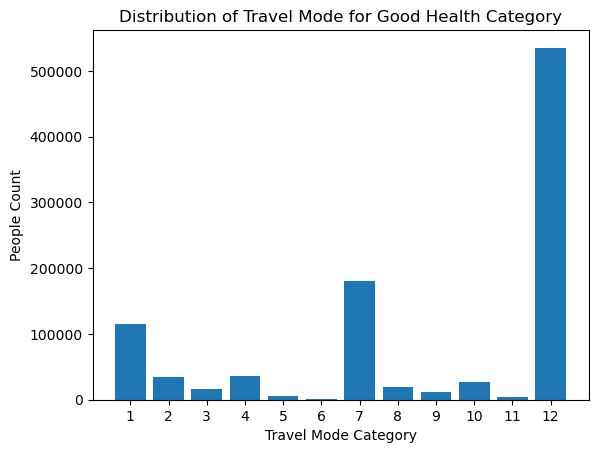

In [25]:
import matplotlib.pyplot as plt

plt.bar(gh_trvlmode_data_fin['trvlmode_cat'].astype(str), gh_trvlmode_data_fin['people_cnt'])
plt.xlabel('Travel Mode Category')
plt.ylabel('People Count')
plt.title('Distribution of Travel Mode for Good Health Category')
plt.show()

In [28]:
data

,gh_1,trvlmodes_1,trvlmodes_2,trvlmodes_3,trvlmodes_4,trvlmodes_5,trvlmodes_6,trvlmodes_7,trvlmodes_8,trvlmodes_9,trvlmodes_10,trvlmodes_11,trvlmodes_12,intercept
0,1,1,0,0,0,0,0,0,0,0,0,0,0,1
1,1,1,0,0,0,0,0,0,0,0,0,0,0,1
2,1,1,0,0,0,0,0,0,0,0,0,0,0,1
3,1,1,0,0,0,0,0,0,0,0,0,0,0,1
4,1,1,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472460,0,0,0,0,0,0,0,0,0,0,0,0,1,1
472461,0,0,0,0,0,0,0,0,0,0,0,0,1,1
472462,0,0,0,0,0,0,0,0,0,0,0,0,1,1
472463,0,0,0,0,0,0,0,0,0,0,0,0,1,1


In [30]:


# Assuming df is your DataFrame
# Add an intercept term to the predictor variable
#data['intercept'] = 1

# Define predictor and response variables
X = data[[ 'trvlmodes_1','trvlmodes_2','trvlmodes_3','trvlmodes_4','trvlmodes_5','trvlmodes_6','trvlmodes_7','trvlmodes_8','trvlmodes_9','trvlmodes_10','trvlmodes_11','trvlmodes_12']]
y = data['gh_1']

# Fit logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Display the summary
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.147623
         Iterations 7


c:\Users\91956\anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


                           Logit Regression Results                           
Dep. Variable:                   gh_1   No. Observations:               472465
Model:                          Logit   Df Residuals:                   472453
Method:                           MLE   Df Model:                           11
Date:                Wed, 15 Nov 2023   Pseudo R-squ.:                     inf
Time:                        13:45:05   Log-Likelihood:                -69747.
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
trvlmodes_1      2.3745      0.012    201.033      0.000       2.351       2.398
trvlmodes_2      2.3514      0.331      7.105      0.000       1.703       3.000
trvlmodes_3      2.3939      0.089     26.92

c:\Users\91956\anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
c:\Users\91956\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:3511: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


In [29]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming df is your DataFrame
# Add an intercept term to the predictor variable
data['intercept'] = 1

# Define predictor and response variables
X = data[['intercept', 'trvlmodes_1', 'trvlmodes_2', 'trvlmodes_3', 'trvlmodes_4', 'trvlmodes_5', 'trvlmodes_6', 'trvlmodes_7', 'trvlmodes_8', 'trvlmodes_9', 'trvlmodes_10', 'trvlmodes_11', 'trvlmodes_12']]
y = data['gh_1']

# Check for multicollinearity
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

# Standardize numeric variables (optional)
# X[['numeric_var1', 'numeric_var2']] = (X[['numeric_var1', 'numeric_var2']] - X[['numeric_var1', 'numeric_var2']].mean()) / X[['numeric_var1', 'numeric_var2']].std()

# Fit logistic regression model with increased maxiter
#logit_model = sm.Logit(y, X, maxiter=1000)
#result = logit_model.fit()

# Display the summary
#print(result.summary())


c:\Users\91956\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
c:\Users\91956\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


        Variable  VIF
0      intercept  0.0
1    trvlmodes_1  inf
2    trvlmodes_2  inf
3    trvlmodes_3  inf
4    trvlmodes_4  inf
5    trvlmodes_5  inf
6    trvlmodes_6  inf
7    trvlmodes_7  inf
8    trvlmodes_8  inf
9    trvlmodes_9  inf
10  trvlmodes_10  inf
11  trvlmodes_11  inf
12  trvlmodes_12  inf


In [61]:
# Get coefficients
beta_0, beta_1 = result.params[0], result.params[1]

# Define the logistic function
def logistic_function(x):
    return 1 / (1 + (2.71828 ** (-x)))

# Calculate probabilities for different values of trvlmodes_1
prob_trvlmodes_1_0 = logistic_function(beta_0)
prob_trvlmodes_1_1 = logistic_function(beta_0 + beta_1)

# Print probabilities
print(f"Probability of gh_1=1 when trvlmodes_11=0: {prob_trvlmodes_1_0:.3f}")
print(f"Probability of gh_1=1 when trvlmodes_11=1: {prob_trvlmodes_1_1:.3f}")


Probability of gh_1=1 when trvlmodes_1=0: 0.805
Probability of gh_1=1 when trvlmodes_1=1: 0.908
